In [531]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Introduction

In [532]:
path = r"F:\Data Sciene\Credit Scoring\bank.csv"
bank_data = pd.read_csv("bank.csv", sep = ";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


- **Context**: This is a dataset revolving around a decision of whether or not a bank should let their user take a loan or not
- **Objectives**: The objectives here is to maximise the Precision metric, so to ensure that bank would not let the wrong people to take their loan and become unable to repay it
- **Dataset**: This dataset came from (kaggle)[https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring] , the column we have to predict is "y"


# Data Preprocessing

In [533]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [534]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [535]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- **Overall**: The data is already clean, so no need for data cleaning for this dataset

# EDA (Exploratory Data Analysis)

In [536]:
bank_data['y'].value_counts()
# This dataset has a mass imbalance, considering using SMOTE or RandomOverSample to smooth out the balance ratio

y
no     4000
yes     521
Name: count, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

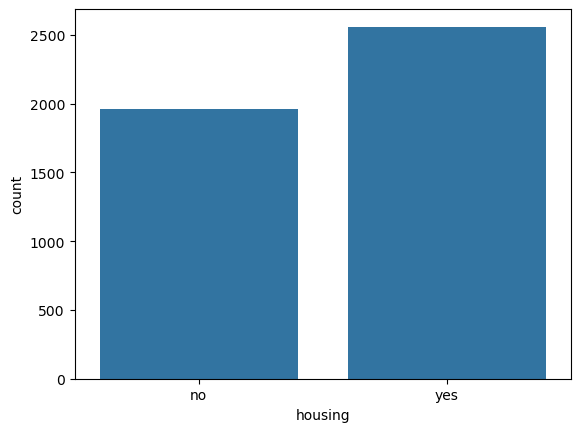

In [537]:
sns.countplot(data = bank_data, x = "housing")

<Axes: xlabel='marital', ylabel='count'>

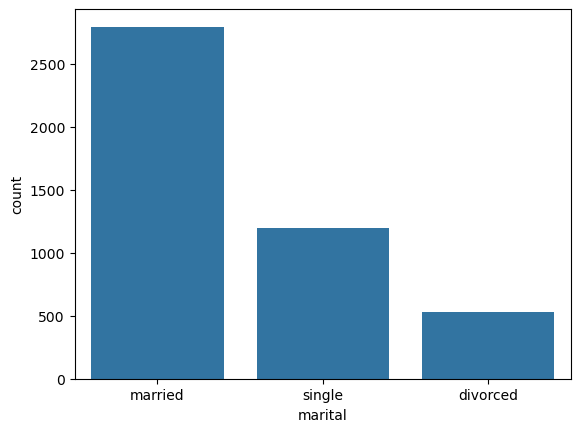

In [538]:
sns.countplot(data = bank_data, x = "marital")

<Axes: xlabel='month', ylabel='Count'>

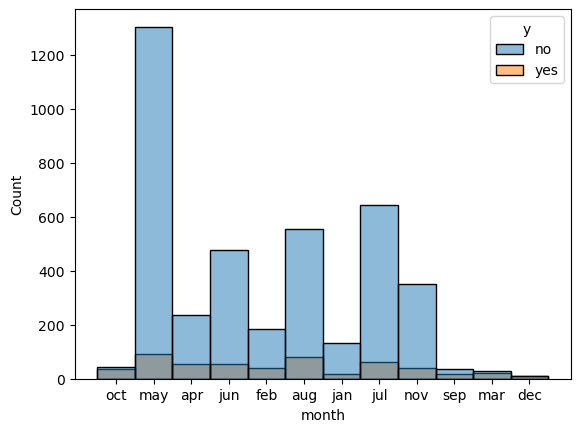

In [539]:
sns.histplot(data = bank_data, x = "month", discrete = True, hue = "y")

In [540]:
bank_data['duration'].describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

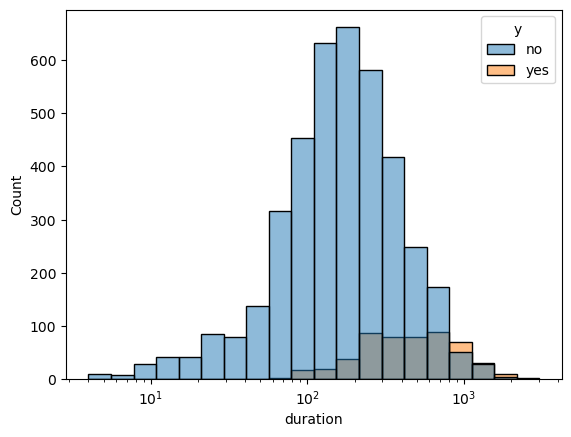

In [541]:
sns.histplot(bank_data, x = "duration",hue="y", bins = 20, log_scale= True)
# The longer they are on the phone, the higher the probability that the outcome will be "yes"

# Feature Engineering

In [542]:
# Applying Label Encodere for Categorial columns
list = ["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
le=LabelEncoder()
for i in list:
    bank_data[i]=le.fit_transform(bank_data[i])

# Apply Random Over Sample to deal with the issue of imbalance dataset
sm=RandomOverSampler()
x=bank_data.iloc[:,:-1]
y=bank_data.iloc[:,-1]
x,y =sm.fit_resample(x,y)

In [543]:
# Apply MinMaxScaler to smooth out the numbers, ensured the model doesn't confuse large number as more important
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)

# Applying Model (Random Forest Classifier)

In [544]:
# Split data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

In [545]:
random_forest = RandomForestClassifier(criterion = "entropy",max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       390
           1       0.96      1.00      0.98       410

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [546]:
importance = random_forest.feature_importances_
feature_importance = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : importance
}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
11,duration,0.359164
5,balance,0.098850
0,age,0.085999
9,day,0.078866
10,month,0.075598
13,pdays,0.044221
1,job,0.043167
12,campaign,0.041099
8,contact,0.038959
15,poutcome,0.032495


# Conclusion
- The Dataset was fairly basic, with almost no data cleaning needed
- I have learn from this project to apply encoding method, how to handle with imbalance data properly
- The Model has sucessfully predict which people the bank should lend them loan, with an accuracy of 98%
- Based on the Importance metric, the duration column have the most correlation with the prediction column, meaning that the longer that the customer stay on a call, the higher the percentage of that customer having a loan